<a href="https://colab.research.google.com/github/kircherlab/ISMB-2025_IGVF-MPRA-Tutorial/blob/main/04_MPRA_data_analysis/04_mpra_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MPRA analysis using BCalm

## Installing BCalm and loading other packages

### Installing BCalm from Github using devtools

In [ ]:
# install.packages("devtools")
library(devtools)
install_github("kircherlab/BCalm")
install.packages("gridExtra")

Loading required package: usethis




abind        (NA -> 1.4-8 ) [CRAN]
XVector      (NA -> 0.48.0) [CRAN]
IRanges      (NA -> 2.42.0) [CRAN]
matrixStats  (NA -> 1.5.0 ) [CRAN]
S4Arrays     (NA -> 1.8.0 ) [CRAN]
S4Vectors    (NA -> 0.46.0) [CRAN]
MatrixGen... (NA -> 1.20.0) [CRAN]
BiocGenerics (NA -> 0.54.0) [CRAN]
GenomeInf... (NA -> 1.2.14) [CRAN]
UCSC.utils   (NA -> 1.4.0 ) [CRAN]
statmod      (NA -> 1.5.0 ) [CRAN]
SparseArray  (NA -> 1.8.0 ) [CRAN]
DelayedArray (NA -> 0.34.1) [CRAN]
GenomeInfoDb (NA -> 1.44.0) [CRAN]
Biobase      (NA -> 2.68.0) [CRAN]
GenomicRa... (NA -> 1.60.0) [CRAN]
limma        (NA -> 3.64.0) [CRAN]
Summarize... (NA -> 1.38.1) [CRAN]
mpra         (NA -> 1.30.1) [CRAN]


Installing 19 packages: abind, XVector, IRanges, matrixStats, S4Arrays, S4Vectors, MatrixGenerics, BiocGenerics, GenomeInfoDbData, UCSC.utils, statmod, SparseArray, DelayedArray, GenomeInfoDb, Biobase, GenomicRanges, limma, SummarizedExperiment, mpra

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



── R CMD build ─────────────────────────────────────────────────────────────────
* checking for file ‘/tmp/RtmpizzbOj/remotes1b424133ae2/kircherlab-BCalm-74ee9dc/DESCRIPTION’ ... OK
* preparing ‘BCalm’:
* checking DESCRIPTION meta-information ... OK
* installing the package to process help pages
* saving partial Rd database
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
* building ‘BCalm_0.99.0.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



### Loading necessary packages

In [ ]:
library(BCalm)
library(tidyverse)
library(readr)
library(dplyr)
library(ggplot2)
library(gridExtra)


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine


The following object is masked from ‘package:Biobase’:

    combine


The following object is masked from ‘package:BiocGenerics’:

    combine




## Loading MPRA dataset and visualization

In [ ]:
mpra_file_url <- "https://github.com/kircherlab/ISMB-2025_IGVF-MPRA-Tutorial/raw/refs/heads/main/03_MPRAsnakeflow/experiment_workflow/reporter_experiment.barcode.HepG2.MPRAworkshop.default.all.tsv.gz"

temp_mpra_file <- tempfile(fileext = ".tsv.gz")
download.file(mpra_file_url, temp_mpra_file)
mpra_data <- read.table(temp_mpra_file,
                      header = TRUE,
                      sep = "\t",
                      stringsAsFactors = FALSE,
                      quote = "",
                      comment.char = "")
unlink(temp_mpra_file)
cat("MPRA data preview:\n")
head(mpra_data)

# relpicate correlations


MPRA data preview:


,barcode,oligo_name,dna_count_1,rna_count_1,dna_count_2,rna_count_2,dna_count_3,rna_count_3
,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>
1,ACCTAAGGAGATACG,oligo_002500,4,10,2,2,NA,NA
2,AGCACATCCGGTAAT,oligo_002500,NA,NA,1,1,NA,NA
3,TTATGATTGTAGATT,oligo_002500,NA,NA,1,4,NA,NA
4,CGTGAAAGTGATATG,oligo_002500,NA,NA,2,8,1,3
5,GTTTGAGAAAATTCT,oligo_002500,3,15,NA,NA,NA,NA
6,TTCGTAGAAAAGTGT,oligo_002500,1,1,NA,NA,NA,NA


### Quick data visualization

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


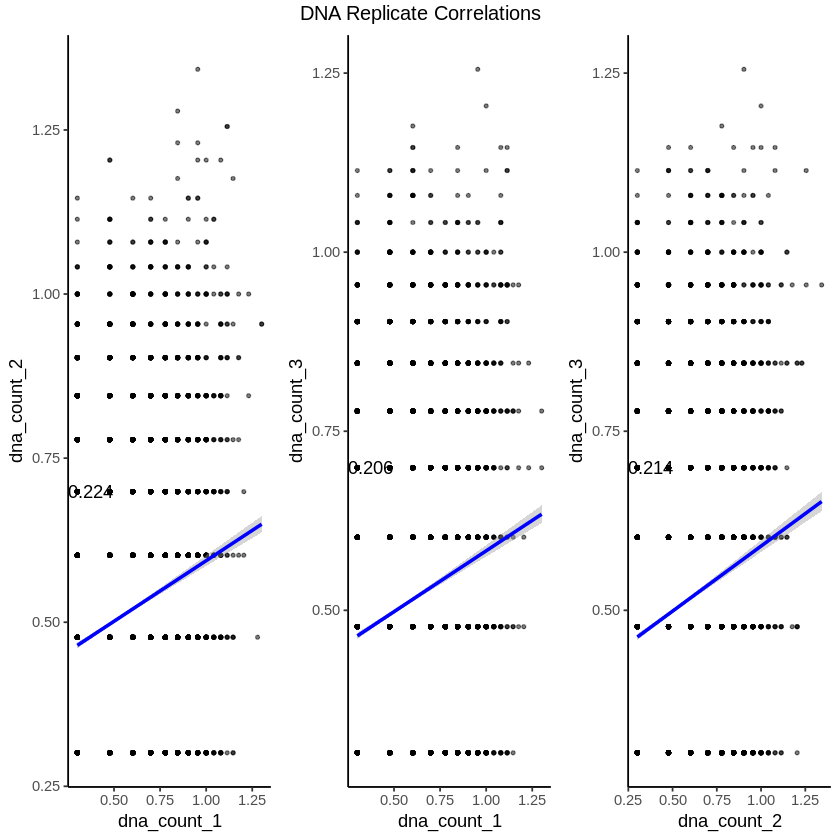

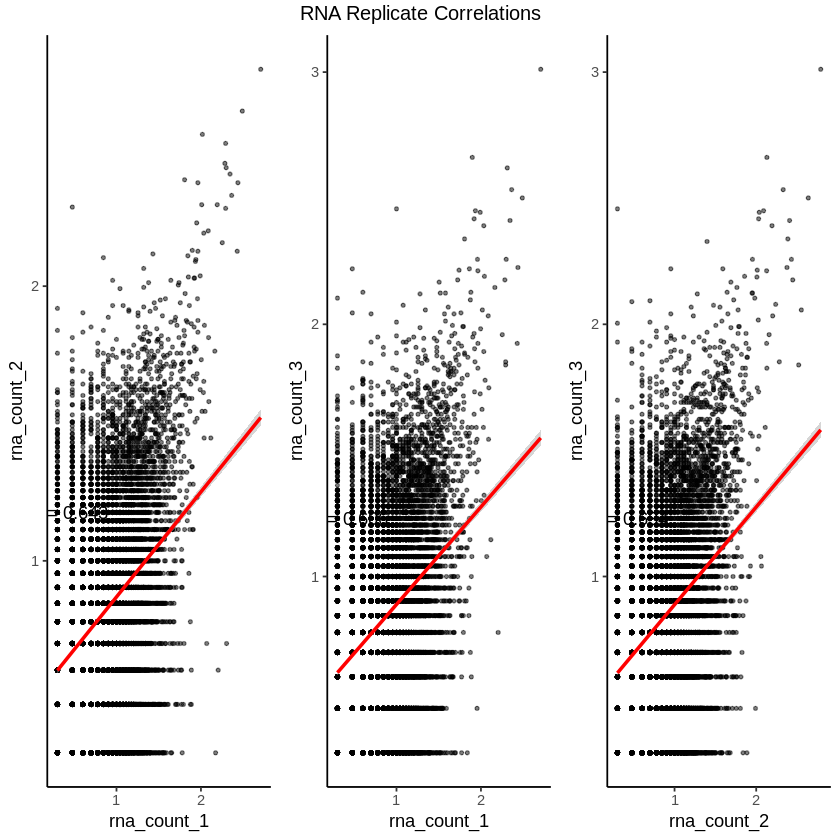

In [ ]:
# function to create pairwise correlation plots
create_replicate_plots <- function(data, col1, col2, col3, plot_title, color = "blue") {
  plot_1_2 <- ggplot(data, aes(x = log10(get(col1) + 1), y = log10(get(col2) + 1))) +
    geom_point(alpha = 0.5, size = 0.8, na.rm = TRUE) +
    geom_smooth(method = "lm", color = color, na.rm = TRUE) +
    labs(x = col1, y = col2) +
    annotate("text",
             x = quantile(log10(data[[col1]] + 1), 0.25, na.rm = TRUE),
             y = quantile(log10(data[[col2]] + 1), 0.9, na.rm = TRUE),
             label = paste0("r = ", round(cor(data[[col1]], data[[col2]],
                                             use = "pairwise.complete.obs"), 3))) +
    theme_classic()
  plot_1_3 <- ggplot(data, aes(x = log10(get(col1) + 1), y = log10(get(col3) + 1))) +
    geom_point(alpha = 0.5, size = 0.8, na.rm = TRUE) +
    geom_smooth(method = "lm", color = color, na.rm = TRUE) +
    labs(x = col1, y = col3) +
    annotate("text",
             x = quantile(log10(data[[col1]] + 1), 0.25, na.rm = TRUE),
             y = quantile(log10(data[[col3]] + 1), 0.9, na.rm = TRUE),
             label = paste0("r = ", round(cor(data[[col1]], data[[col3]],
                                             use = "pairwise.complete.obs"), 3))) +
    theme_classic()
  plot_2_3 <- ggplot(data, aes(x = log10(get(col2) + 1), y = log10(get(col3) + 1))) +
    geom_point(alpha = 0.5, size = 0.8, na.rm = TRUE) +
    geom_smooth(method = "lm", color = color, na.rm = TRUE) +
    labs(x = col2, y = col3) +
    annotate("text",
             x = quantile(log10(data[[col2]] + 1), 0.25, na.rm = TRUE),
             y = quantile(log10(data[[col3]] + 1), 0.9, na.rm = TRUE),
             label = paste0("r = ", round(cor(data[[col2]], data[[col3]],
                                             use = "pairwise.complete.obs"), 3))) +
    theme_classic()
    grid.arrange(plot_1_2, plot_1_3, plot_2_3, ncol = 3, top = plot_title)
}

# DNA counts correlation
create_replicate_plots(mpra_data,
                      "dna_count_1", "dna_count_2", "dna_count_3",
                      "DNA Replicate Correlations",
                      "blue")

# RNA count correlations
create_replicate_plots(mpra_data,
                      "rna_count_1", "rna_count_2", "rna_count_3",
                      "RNA Replicate Correlations",
                      "red")

## Element analysis

Here we will check the relative activity of our tested sequences with respect to the negative controls in our data.


In [ ]:
# download the labels file containing information about the control and test sequence IDs
labels_url <- "https://raw.githubusercontent.com/kircherlab/ISMB-2025_IGVF-MPRA-Tutorial/main/04_MPRA_data_analysis/labels.tsv"
download.file(labels_url, "labels.tsv")

# Check if file was downloaded successfully
if (file.exists("labels.tsv") && file.size("labels.tsv") > 0) {
  labels <- read.table("labels.tsv", header = FALSE, sep = "\t")
  cat("Labels preview:\n")
  head(labels)
} else {
  cat("Labels file not found or empty.\n")
}
table(labels$V2)

Labels preview:


,V1,V2
,<chr>,<chr>
1,oligo_002561,NegativeControl
2,oligo_002578,NegativeControl
3,oligo_002601,NegativeControl
4,oligo_002586,NegativeControl
5,oligo_002542,NegativeControl
6,oligo_002548,NegativeControl



NegativeControl     TestedOligo 
            104            2000 

In [ ]:
# convert labels to a named vector for BCalm analysis

labels_bcalm = labels$V2
names(labels_bcalm) = labels$V1

In [ ]:
# create rna and dna element data

dna_elem <- create_dna_df(mpra_data, id_column_name="oligo_name")
rna_elem <- create_rna_df(mpra_data, id_column_name="oligo_name")

# creating label set data structure
BcLabelMPRASet <- MPRASet(DNA = dna_elem, RNA = rna_elem, eid = row.names(dna_elem), barcode = NULL, label=labels_bcalm)
nr_reps = 3
bcs <- ncol(dna_elem) / nr_reps
block_vector <- rep(1:nr_reps, each=bcs)


In [ ]:
# fit the data to a linear model
mpralm_fit_element <- fit_elements(object = BcLabelMPRASet, normalize=TRUE, block = block_vector, plot = FALSE)


### Visualization of results

Warning message:
“Removed 4 rows containing missing values or values outside the scale range
(`geom_bar()`).”


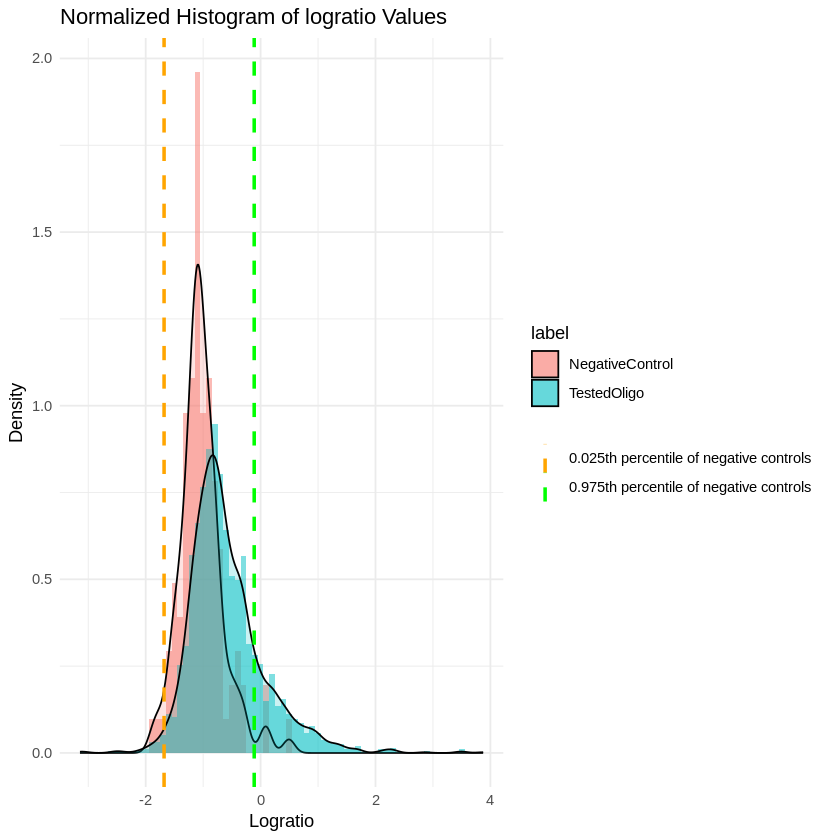

In [ ]:
# visualizing the results
plot_groups(mpralm_fit_element, 0.975, neg_label="NegativeControl", test_label="TestedOligo")


In [ ]:
# top differentially expressed elements

treat <- mpra_treat(mpralm_fit_element, 0.975, neg_label="NegativeControl")
result <- topTreat(treat, coef = 1, number = Inf)
head(result)

,logFC,AveExpr,t,P.Value,adj.P.Val
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
oligo_006626,3.873655,3.873655,25.36861,7.240917e-132,1.481492e-128
oligo_006624,3.475998,3.475998,19.96247,8.685168e-85,8.884927e-82
oligo_006468,2.273945,2.273945,17.72432,5.431718e-68,3.704432e-65
oligo_005641,2.338289,2.338289,15.82884,4.767054e-55,2.438348e-52
oligo_005287,2.202156,2.202156,14.57154,3.542269e-47,1.449496e-44
oligo_006201,2.236749,2.236749,14.01592,6.993085e-44,2.384642e-41


## Variant analysis

In [ ]:
# download the oligo map file which contains information about the reference and alternate sequence IDs
oligomap_url <- "https://raw.githubusercontent.com/kircherlab/ISMB-2025_IGVF-MPRA-Tutorial/main/04_MPRA_data_analysis/oligomap.tsv"
download.file(oligomap_url, "oligomap.tsv")

# check if file was downloaded successfully
if (file.exists("oligomap.tsv") && file.size("oligomap.tsv") > 0) {
  oligomap <- read.table("oligomap.tsv", header = TRUE, sep = "\t")
  cat("Oligomap preview:\n")
  head(oligomap)
} else {
  cat("Oligomap file not found or empty.\n")
}

Oligomap preview:


,ID,REF,ALT
,<chr>,<chr>,<chr>
1,Arensbergen_rs9814223_chr3:24362252A>G,oligo_005265,oligo_005266
2,Arensbergen_rs1605769_chr4:59436721T>C,oligo_005267,oligo_005268
3,Arensbergen_rs3815923_chr5:54253581A>G,oligo_005269,oligo_005270
4,Arensbergen_rs1928227_chr9:88698591C>A,oligo_005271,oligo_005272
5,Arensbergen_rs7156067_chr14:89393045G>A,oligo_005273,oligo_005275
6,Arensbergen_rs1204985_chr14:72218104A>G,oligo_005274,oligo_005276


In [ ]:
colnames(mpra_data)[1] = "Barcode"
colnames(mpra_data)[2] = "name"
mpra_data$name <- tolower(mpra_data$name)


var_df <- create_var_df(mpra_data, oligomap)

dna_var <- create_dna_df(var_df)
rna_var <- create_rna_df(var_df)

BcVariantMPRASet <- MPRASet(DNA = dna_var, RNA = rna_var, eid = row.names(dna_var), barcode = NULL)

design <- data.frame(intcpt = 1, alt = grepl("alt", colnames(BcVariantMPRASet)))
block_vector <- rep(1:nr_reps, each=bcs)
bcs <- ncol(dna_var) / nr_reps

mpralm_fit_variants <- mpralm(object = BcVariantMPRASet, design = design, aggregate = "none", normalize = TRUE, model_type = "corr_groups", plot = FALSE, block = block_vector)


Warning message:
“Partial NA coefficients for 632 probe(s)”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message:
“Partial NA coefficients for 632 probe(s)”


### Visualizing the results

[1] "Activating variants: 4.18 %"
[1] "Repressing variants: 2.99 %"
[1] "Neutral variants: 37.34 %"
    Category Percentage
1 Activating       4.18
2 Repressing       2.99
3    Neutral      37.34


Warning message:
“Removed 632 rows containing non-finite outside the scale range (`stat_bin()`).”
Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_bar()`).”


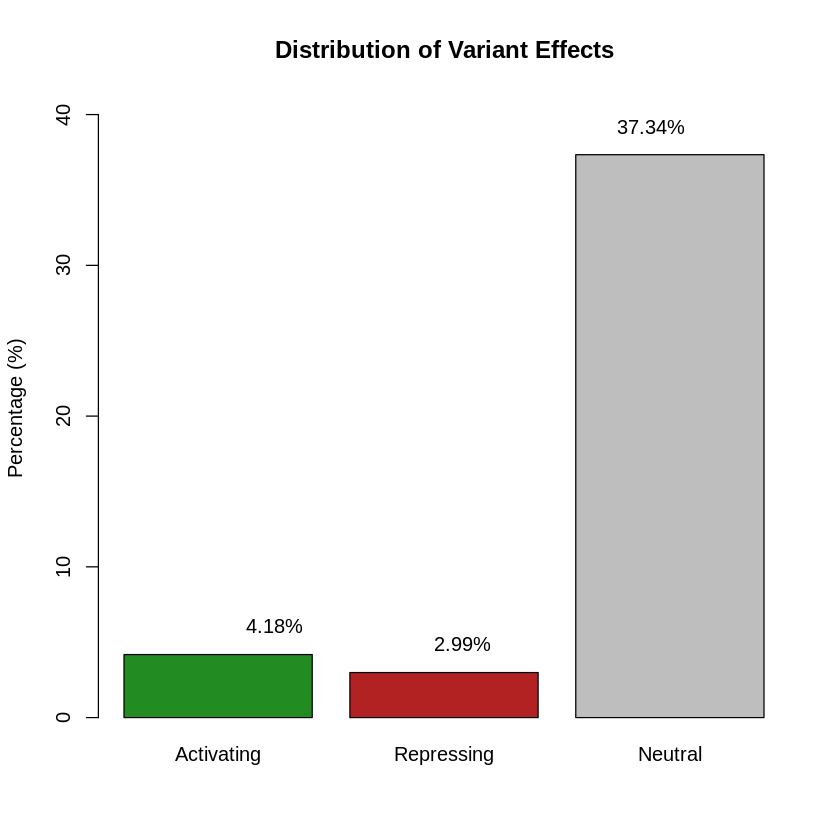

Warning message:
“Removed 632 rows containing missing values or values outside the scale range
(`geom_point()`).”


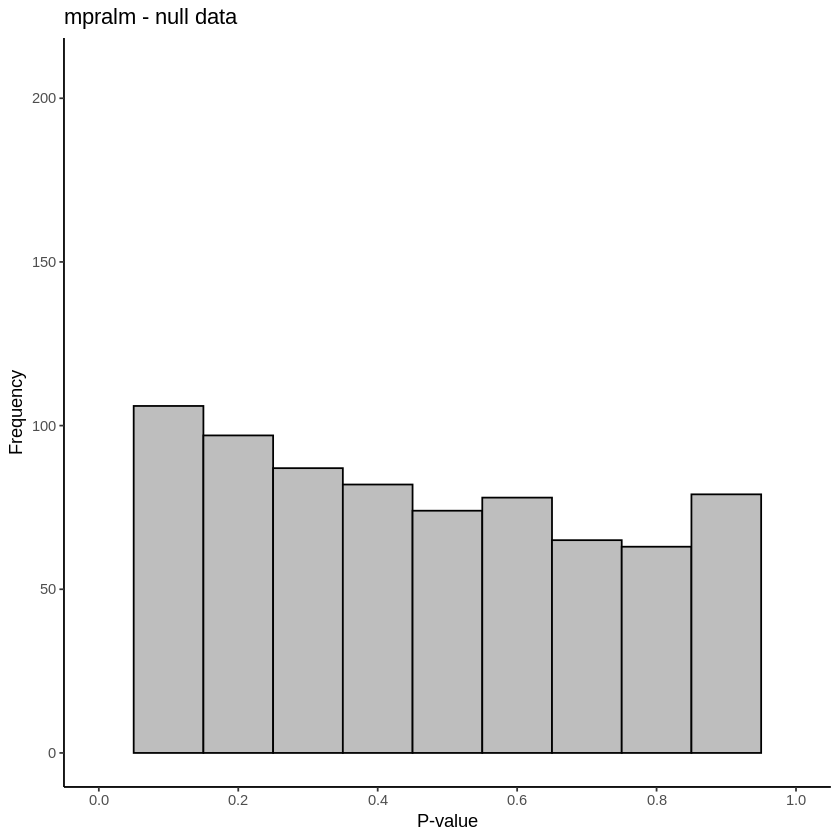

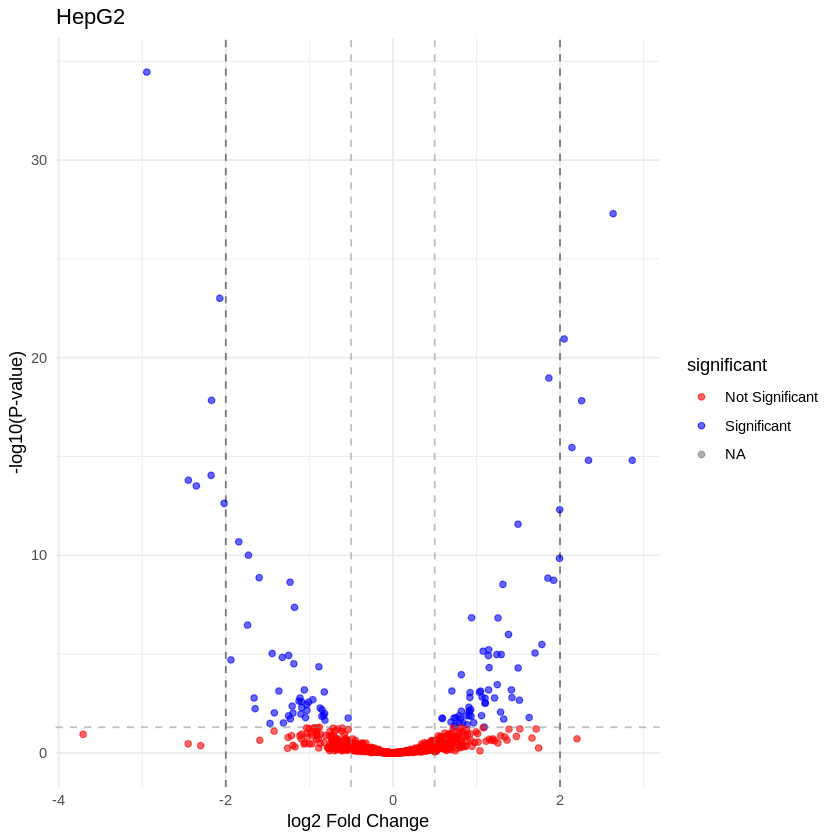

In [61]:
top_var <- topTable(mpralm_fit_variants, coef = 2, number = Inf)
top_var$significant <- ifelse(abs(top_var$logFC) > 0.3 & top_var$adj.P.Val < 0.05, "Significant", "Not Significant")

percent_activating <- 100* length(top_var[which(top_var$significant == "Significant" & top_var$logFC > 0), ]$logFC) /length(top_var$logFC)
percent_repressing <- 100* length(top_var[which(top_var$significant == "Significant" & top_var$logFC < 0), ]$logFC) /length(top_var$logFC)
percent_neutral <- 100 * length(which(abs(top_var$logFC) < 0.5 & top_var$adj.P.Val > 0.05)) / length(top_var$logFC)

print(paste("Activating variants:", round(percent_activating, 2), "%"))
print(paste("Repressing variants:", round(percent_repressing, 2), "%"))
print(paste("Neutral variants:", round(percent_neutral, 2), "%"))

variant_summary <- data.frame(
  Category = c("Activating", "Repressing", "Neutral"),
  Percentage = c(percent_activating, percent_repressing, percent_neutral)
)
variant_summary$Percentage <- round(variant_summary$Percentage, 2)

print(variant_summary)

barplot(variant_summary$Percentage,
        names.arg = variant_summary$Category,
        col = c("forestgreen", "firebrick", "gray"),
        main = "Distribution of Variant Effects",
        ylab = "Percentage (%)",
        ylim = c(0, max(variant_summary$Percentage) * 1.1))
text(x = 1:3,
     y = variant_summary$Percentage + max(variant_summary$Percentage) * 0.05,
     labels = paste0(variant_summary$Percentage, "%"),
     col = "black")

p_values <- mpralm_fit_variants$p.value[, "alt"]

ggplot(data.frame(p_value = p_values), aes(x = p_value)) +
  geom_histogram(binwidth = 0.1, fill = "gray", color = "black") +
  scale_x_continuous(limits = c(0, 1), breaks = seq(0, 1, 0.2)) +
  labs(
    title = "mpralm - null data",
    x = "P-value",
    y = "Frequency"
  ) +
  theme_classic()

ggplot(top_var, aes(x = logFC, y = -log10(adj.P.Val), color = significant)) +
  geom_point(alpha = 0.6) +
  scale_color_manual(values = c("Not Significant" = "red", "Significant" = "blue")) +
  labs(title = "HepG2",
       x = "log2 Fold Change",
       y = "-log10(P-value)") +
  theme_minimal() +
  geom_vline(xintercept = 0.5, linetype = "dashed", color = "gray50", alpha = 0.5) +
  geom_vline(xintercept = -0.5, linetype = "dashed", color = "gray50", alpha = 0.5) +
  geom_vline(xintercept = 2, linetype = "dashed", color = "black", alpha = 0.5) +
  geom_vline(xintercept = -2, linetype = "dashed", color = "black", alpha = 0.5) +
  geom_hline(yintercept = -log10(0.05), linetype = "dashed", color = "gray50", alpha = 0.5)



We will now check the effect of an SNV in a specific case

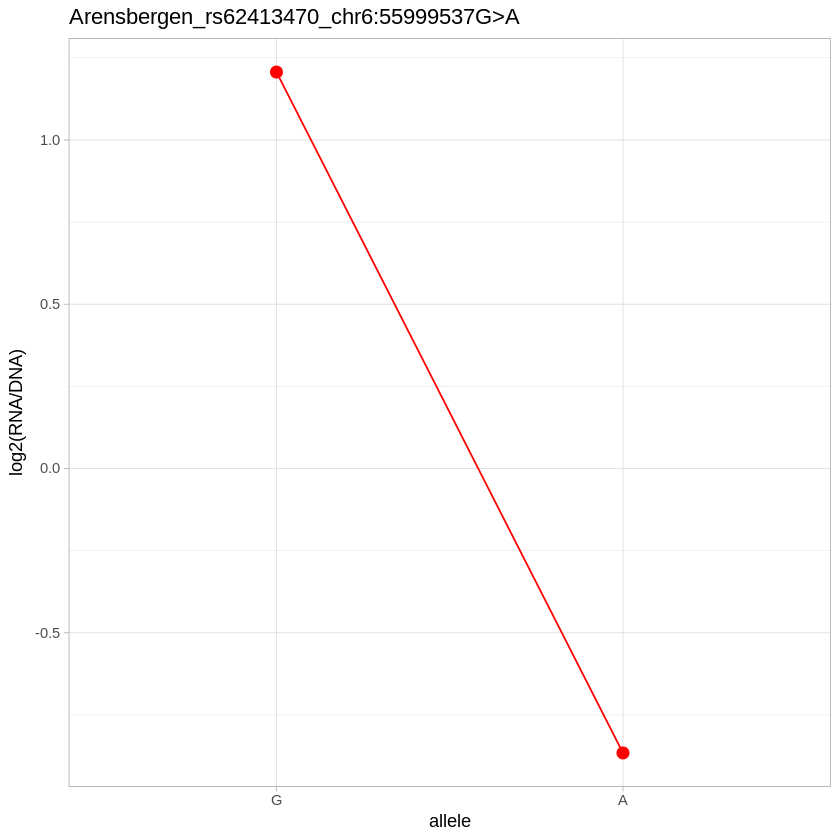

In [62]:
# Filter data for a specific variant to see the effect of an SNV
variant_id <- "Arensbergen_rs62413470_chr6:55999537G>A"
intercept <- mpralm_fit_variants$coefficients[variant_id, "intcpt"]
alt_effect <- mpralm_fit_variants$coefficients[variant_id, "alt"]

plot_data <- data.frame(
  allele = c("G", "A"),  # Reference and alternate alleles
  log2_ratio = c(intercept, intercept + alt_effect)
)
plot_data$allele <- factor(plot_data$allele, levels = c("G", "A"))

ggplot(plot_data, aes(x = allele, y = log2_ratio)) +
  geom_point(size = 3, color = "red") +
  geom_line(group = 1, color = "red") +
  labs(
    title = variant_id,
    x = "allele",
    y = "log2(RNA/DNA)"
  ) +
  theme_light()